In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

training_file = '../training_processed.csv'
testing_file = '../智能制造赛道测试集/test/testing.csv'

## 01 - loading and preprocess data

In [55]:
# load training & testing file
training = pd.read_csv(training_file, low_memory=False)
testing = pd.read_csv(testing_file, low_memory=False)

numerical_features = ['oxygen_set_value', # '氧量设定值'
                      'primary_air_volume', # '一次风量'
                      'grate_manual_command',  #  '炉排手动指令'
                      'main_steam_flow_set_value', # '主蒸汽流量设定值'
                      'ejector_manual_command', #  '推料器手动指令'
                      'ejector_automatic_command', # '推料器自动指令'
                      'nox_content', # NOx含量
                      'grate_actual_operation_command', # 炉排实际运行指令
                      'secondary_air_control_door', # 二次风调门
                      'hcl_content', # HCL含量
                      'secondary_air_volume', # 二次风量
                      'water_flow', # 给水流量
                      'so2_content', # SO2含量
                      'drum_water_level', # 汽包水位
                      'induced_fan_speed', # 引风机转速
                      'co_content', # CO含量
                      'primary_damper'] # 一次风调门

categorical_features = ['ejector_automatic_switching_signal', # '推料器自动投退信号'
                        'grate_automatic_switching_signal', # '炉排自动投退信号'
                        'pusher_on_or_off', # 推料器启停
                        'grate_on_or_off'] # 炉排启停

label = ['main_steam_flow']

In [56]:
training.head()

,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper,main_steam_flow
0,2021-12-20 00:00:00,5.5,72919.6563,True,True,43.9083,60.0,53.9083,53.9094,57.4444,...,4330.1270,73.4054,2.6458,True,1.6872,66.7986,True,1.6042,75.5532,54.3032
1,2021-12-20 00:00:01,5.5,73034.8047,True,True,44.0000,60.0,54.0000,54.0353,57.3889,...,4898.9800,73.5788,2.5833,True,1.6107,66.8056,True,1.5903,75.4144,54.1495
2,2021-12-20 00:00:02,5.5,73111.4609,True,True,44.0452,60.0,54.0452,54.0476,57.5556,...,4663.6895,73.7589,2.6181,True,1.5039,66.8195,True,1.6597,75.4051,54.4899
3,2021-12-20 00:00:03,5.5,73134.4375,True,True,44.0575,60.0,54.0575,54.0600,57.5370,...,4898.9800,73.9473,2.6389,True,1.5284,66.7894,True,1.6736,75.4537,54.6693
4,2021-12-20 00:00:04,5.5,73493.5625,True,True,44.0699,60.0,54.0699,54.0724,57.3889,...,4898.9800,74.1118,2.6875,True,1.6921,66.7662,True,1.6319,75.4144,54.5034


In [57]:
testing.head()

,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,hcl_content,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper
0,2021-12-22 23:30:00,25.0,72881.2344,False,False,50.0,60.0,40.0,70.0,111.4074,...,2.8333,18553.9766,68.6522,3.2569,False,7.5292,67.4120,False,2.5278,65.5370
1,2021-12-22 23:30:01,25.0,73729.4688,False,False,50.0,60.0,40.0,70.0,111.4074,...,2.8194,18472.9531,68.6643,3.2778,False,7.4884,67.4167,False,2.5208,65.5532
2,2021-12-22 23:30:02,25.0,74221.6875,False,False,50.0,60.0,40.0,70.0,111.4630,...,2.7593,18553.9766,68.6404,3.3194,False,7.4432,67.4468,False,2.5625,65.5463
3,2021-12-22 23:30:03,25.0,73600.1953,False,False,50.0,60.0,40.0,70.0,109.3333,...,2.5093,18553.9766,68.6220,2.8958,False,7.4716,67.4306,False,1.0347,65.5231
4,2021-12-22 23:30:04,25.0,73057.8047,False,False,50.0,60.0,40.0,70.0,109.2593,...,2.5046,18614.5098,68.6118,2.8333,False,7.5600,67.4468,False,0.9722,65.5463


In [58]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259200 entries, 0 to 259199
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   datetime                            259200 non-null  object 
 1   oxygen_set_value                    259200 non-null  float64
 2   primary_air_volume                  259200 non-null  float64
 3   ejector_automatic_switching_signal  259200 non-null  bool   
 4   grate_automatic_switching_signal    259200 non-null  bool   
 5   grate_manual_command                259200 non-null  float64
 6   main_steam_flow_set_value           259200 non-null  float64
 7   ejector_manual_command              259200 non-null  float64
 8   ejector_automatic_command           259200 non-null  float64
 9   nox_content                         259200 non-null  float64
 10  grate_actual_operation_command      259200 non-null  float64
 11  secondary_air_control_door

In [59]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   datetime                            1800 non-null   object 
 1   oxygen_set_value                    1800 non-null   float64
 2   primary_air_volume                  1800 non-null   float64
 3   ejector_automatic_switching_signal  1800 non-null   bool   
 4   grate_automatic_switching_signal    1800 non-null   bool   
 5   grate_manual_command                1800 non-null   float64
 6   main_steam_flow_set_value           1800 non-null   float64
 7   ejector_manual_command              1800 non-null   float64
 8   ejector_automatic_command           1800 non-null   float64
 9   nox_content                         1800 non-null   float64
 10  grate_actual_operation_command      1800 non-null   float64
 11  secondary_air_control_door          1800 no

## 02 feature engineering

In [60]:
# append traning and testing dataframe (apply feature engineering together, avoid training and serving skew)
# adding label column for testing dataset before merge
testing['main_steam_flow'] = -1
data_all = pd.concat([training, testing], axis=0)
data_all.head()

,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper,main_steam_flow
0,2021-12-20 00:00:00,5.5,72919.6563,True,True,43.9083,60.0,53.9083,53.9094,57.4444,...,4330.1270,73.4054,2.6458,True,1.6872,66.7986,True,1.6042,75.5532,54.3032
1,2021-12-20 00:00:01,5.5,73034.8047,True,True,44.0000,60.0,54.0000,54.0353,57.3889,...,4898.9800,73.5788,2.5833,True,1.6107,66.8056,True,1.5903,75.4144,54.1495
2,2021-12-20 00:00:02,5.5,73111.4609,True,True,44.0452,60.0,54.0452,54.0476,57.5556,...,4663.6895,73.7589,2.6181,True,1.5039,66.8195,True,1.6597,75.4051,54.4899
3,2021-12-20 00:00:03,5.5,73134.4375,True,True,44.0575,60.0,54.0575,54.0600,57.5370,...,4898.9800,73.9473,2.6389,True,1.5284,66.7894,True,1.6736,75.4537,54.6693
4,2021-12-20 00:00:04,5.5,73493.5625,True,True,44.0699,60.0,54.0699,54.0724,57.3889,...,4898.9800,74.1118,2.6875,True,1.6921,66.7662,True,1.6319,75.4144,54.5034


In [61]:
data_all.tail()

,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper,main_steam_flow
1795,2021-12-22 23:59:55,25.0,79948.1719,True,True,50.0,60.0,100.0,100.0,71.4815,...,6244.9980,68.5028,35.1597,False,14.6422,69.6412,False,2.0069,70.9051,-1.0
1796,2021-12-22 23:59:56,25.0,79695.5313,True,True,50.0,60.0,100.0,100.0,71.6481,...,6244.9980,68.4625,35.1597,False,14.4919,69.4931,False,2.0347,70.9282,-1.0
1797,2021-12-22 23:59:57,25.0,79067.4688,True,True,50.0,60.0,100.0,100.0,71.6481,...,6244.9980,68.4506,35.2014,False,14.4141,69.5486,False,2.0278,70.8194,-1.0
1798,2021-12-22 23:59:58,25.0,78748.0078,True,True,50.0,60.0,100.0,100.0,71.8519,...,6062.1777,68.4846,35.2500,False,14.3788,69.7292,False,2.0764,70.6875,-1.0
1799,2021-12-22 23:59:59,25.0,78989.5000,True,True,50.0,60.0,100.0,100.0,72.0556,...,5612.4863,68.5730,33.7500,False,14.0503,69.9769,False,2.0069,70.5995,-1.0


In [62]:
# normalization
scaler = MinMaxScaler()
# fit scaler
scaler.fit(data_all[numerical_features])
# print log
print(f"Scaler max value is {scaler.data_max_}, min value is {scaler.data_min_}")
# transform data
data_all[numerical_features] = scaler.transform(data_all[numerical_features])

data_all.head()

Scaler max value is [7.00000000e+01 1.22637047e+05 1.00000000e+02 7.00361000e+01
 1.00000200e+02 1.00000200e+02 1.34537000e+02 1.00000000e+02
 8.99792000e+01 5.80046000e+01 3.57910586e+04 1.00297200e+02
 2.99617800e+02 4.69223000e+01 9.12498000e+01 3.00208100e+02
 1.00023100e+02], min value is [ 2.88280000e+00  1.99712715e+04  3.00000000e+01  4.26552000e+01
  3.00000000e+01  4.00000000e+01  2.02778000e+01  2.99998000e+01
  9.68520000e+00  4.07400000e-01  0.00000000e+00  4.68703000e+01
 -1.45800000e-01 -2.79869000e+01  4.29398000e+01 -4.58100000e-01
  2.49977000e+01]


,datetime,oxygen_set_value,primary_air_volume,ejector_automatic_switching_signal,grate_automatic_switching_signal,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,...,secondary_air_volume,water_flow,so2_content,pusher_on_or_off,drum_water_level,induced_fan_speed,grate_on_or_off,co_content,primary_damper,main_steam_flow
0,2021-12-20 00:00:00,0.038994,0.515735,True,True,0.198690,0.633463,0.341546,0.231823,0.325283,...,0.120983,0.496662,0.009313,True,0.396134,0.493869,True,0.006859,0.673845,54.3032
1,2021-12-20 00:00:01,0.038994,0.516857,True,True,0.200000,0.633463,0.342856,0.233921,0.324797,...,0.136877,0.499907,0.009104,True,0.395113,0.494014,True,0.006813,0.671995,54.1495
2,2021-12-20 00:00:02,0.038994,0.517604,True,True,0.200646,0.633463,0.343502,0.234126,0.326256,...,0.130303,0.503278,0.009220,True,0.393687,0.494301,True,0.007044,0.671871,54.4899
3,2021-12-20 00:00:03,0.038994,0.517828,True,True,0.200821,0.633463,0.343678,0.234333,0.326094,...,0.136877,0.506805,0.009290,True,0.394014,0.493678,True,0.007090,0.672519,54.6693
4,2021-12-20 00:00:04,0.038994,0.521326,True,True,0.200999,0.633463,0.343855,0.234539,0.324797,...,0.136877,0.509884,0.009452,True,0.396200,0.493198,True,0.006951,0.671995,54.5034


In [63]:
# one-encoding
onehot_encoding = pd.get_dummies(data_all[categorical_features].astype(str))
# concat back to previous dataframe
data_all = pd.concat([data_all, onehot_encoding], axis=1)
# drop previous column
data_all = data_all.drop(columns=categorical_features)
# save to local disk
# data_all.to_csv('../data_all.csv', index=False)

In [64]:
# look back step
look_back = 5

# shifting main_steam_flow make it as an input feature
for i in range(1, look_back + 1):
    data_all[f't_minus_{i}'] = data_all['main_steam_flow'].shift(i)
# drop na
data_all.dropna(inplace=True)

data_all.head()

,datetime,oxygen_set_value,primary_air_volume,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,grate_actual_operation_command,secondary_air_control_door,...,grate_automatic_switching_signal_True,pusher_on_or_off_False,pusher_on_or_off_True,grate_on_or_off_False,grate_on_or_off_True,t_minus_1,t_minus_2,t_minus_3,t_minus_4,t_minus_5
5,2021-12-20 00:00:05,0.038994,0.515810,0.201176,0.633463,0.344032,0.234744,0.320745,0.201142,0.141148,...,1,0,1,0,1,54.5034,54.6693,54.4899,54.1495,54.3032
6,2021-12-20 00:00:06,0.038994,0.512285,0.201351,0.633463,0.344208,0.234951,0.321880,0.201318,0.143022,...,1,0,1,0,1,54.4814,54.5034,54.6693,54.4899,54.1495
7,2021-12-20 00:00:07,0.038994,0.506699,0.200621,0.633463,0.343478,0.233978,0.322366,0.201512,0.144665,...,1,0,1,0,1,54.4935,54.4814,54.5034,54.6693,54.4899
8,2021-12-20 00:00:08,0.038994,0.504649,0.200647,0.633463,0.343503,0.234114,0.320907,0.200625,0.145270,...,1,0,1,0,1,54.4664,54.4935,54.4814,54.5034,54.6693
9,2021-12-20 00:00:09,0.038994,0.509120,0.200764,0.633463,0.343620,0.234253,0.319287,0.200755,0.147028,...,1,0,1,0,1,54.5466,54.4664,54.4935,54.4814,54.5034


In [65]:
data_all.tail()

,datetime,oxygen_set_value,primary_air_volume,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,grate_actual_operation_command,secondary_air_control_door,...,grate_automatic_switching_signal_True,pusher_on_or_off_False,pusher_on_or_off_True,grate_on_or_off_False,grate_on_or_off_True,t_minus_1,t_minus_2,t_minus_3,t_minus_4,t_minus_5
1795,2021-12-22 23:59:55,0.329531,0.584196,0.285714,0.633463,0.999997,0.999997,0.448136,0.285716,0.137400,...,1,1,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0
1796,2021-12-22 23:59:56,0.329531,0.581735,0.285714,0.633463,0.999997,0.999997,0.449594,0.285716,0.136968,...,1,1,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0
1797,2021-12-22 23:59:57,0.329531,0.575617,0.285714,0.633463,0.999997,0.999997,0.449594,0.285716,0.136506,...,1,1,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0
1798,2021-12-22 23:59:58,0.329531,0.572506,0.285714,0.633463,0.999997,0.999997,0.451378,0.285716,0.137457,...,1,1,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0
1799,2021-12-22 23:59:59,0.329531,0.574858,0.285714,0.633463,0.999997,0.999997,0.453161,0.285716,0.136997,...,1,1,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0


In [66]:
# split data_all back to training and testing
training = data_all.loc[data_all['main_steam_flow']!= -1]
testing = data_all.loc[data_all['main_steam_flow']== -1]

training.head()

,datetime,oxygen_set_value,primary_air_volume,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,grate_actual_operation_command,secondary_air_control_door,...,grate_automatic_switching_signal_True,pusher_on_or_off_False,pusher_on_or_off_True,grate_on_or_off_False,grate_on_or_off_True,t_minus_1,t_minus_2,t_minus_3,t_minus_4,t_minus_5
5,2021-12-20 00:00:05,0.038994,0.515810,0.201176,0.633463,0.344032,0.234744,0.320745,0.201142,0.141148,...,1,0,1,0,1,54.5034,54.6693,54.4899,54.1495,54.3032
6,2021-12-20 00:00:06,0.038994,0.512285,0.201351,0.633463,0.344208,0.234951,0.321880,0.201318,0.143022,...,1,0,1,0,1,54.4814,54.5034,54.6693,54.4899,54.1495
7,2021-12-20 00:00:07,0.038994,0.506699,0.200621,0.633463,0.343478,0.233978,0.322366,0.201512,0.144665,...,1,0,1,0,1,54.4935,54.4814,54.5034,54.6693,54.4899
8,2021-12-20 00:00:08,0.038994,0.504649,0.200647,0.633463,0.343503,0.234114,0.320907,0.200625,0.145270,...,1,0,1,0,1,54.4664,54.4935,54.4814,54.5034,54.6693
9,2021-12-20 00:00:09,0.038994,0.509120,0.200764,0.633463,0.343620,0.234253,0.319287,0.200755,0.147028,...,1,0,1,0,1,54.5466,54.4664,54.4935,54.4814,54.5034


In [67]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259195 entries, 5 to 259199
Data columns (total 32 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   datetime                                  259195 non-null  object 
 1   oxygen_set_value                          259195 non-null  float64
 2   primary_air_volume                        259195 non-null  float64
 3   grate_manual_command                      259195 non-null  float64
 4   main_steam_flow_set_value                 259195 non-null  float64
 5   ejector_manual_command                    259195 non-null  float64
 6   ejector_automatic_command                 259195 non-null  float64
 7   nox_content                               259195 non-null  float64
 8   grate_actual_operation_command            259195 non-null  float64
 9   secondary_air_control_door                259195 non-null  float64
 10  hcl_content         

In [68]:
testing.head()

,datetime,oxygen_set_value,primary_air_volume,grate_manual_command,main_steam_flow_set_value,ejector_manual_command,ejector_automatic_command,nox_content,grate_actual_operation_command,secondary_air_control_door,...,grate_automatic_switching_signal_True,pusher_on_or_off_False,pusher_on_or_off_True,grate_on_or_off_False,grate_on_or_off_True,t_minus_1,t_minus_2,t_minus_3,t_minus_4,t_minus_5
0,2021-12-22 23:30:00,0.329531,0.515361,0.285714,0.633463,0.142857,0.499998,0.797569,0.285716,0.495286,...,0,1,0,1,0,58.0246,58.0246,58.0246,58.0246,58.0246
1,2021-12-22 23:30:01,0.329531,0.523623,0.285714,0.633463,0.142857,0.499998,0.797569,0.285716,0.495084,...,0,1,0,1,0,-1.0000,58.0246,58.0246,58.0246,58.0246
2,2021-12-22 23:30:02,0.329531,0.528418,0.285714,0.633463,0.142857,0.499998,0.798056,0.285716,0.495545,...,0,1,0,1,0,-1.0000,-1.0000,58.0246,58.0246,58.0246
3,2021-12-22 23:30:03,0.329531,0.522364,0.285714,0.633463,0.142857,0.499998,0.779416,0.285716,0.495863,...,0,1,0,1,0,-1.0000,-1.0000,-1.0000,58.0246,58.0246
4,2021-12-22 23:30:04,0.329531,0.517081,0.285714,0.633463,0.142857,0.499998,0.778769,0.285716,0.495747,...,0,1,0,1,0,-1.0000,-1.0000,-1.0000,-1.0000,58.0246


In [69]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1799
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   datetime                                  1800 non-null   object 
 1   oxygen_set_value                          1800 non-null   float64
 2   primary_air_volume                        1800 non-null   float64
 3   grate_manual_command                      1800 non-null   float64
 4   main_steam_flow_set_value                 1800 non-null   float64
 5   ejector_manual_command                    1800 non-null   float64
 6   ejector_automatic_command                 1800 non-null   float64
 7   nox_content                               1800 non-null   float64
 8   grate_actual_operation_command            1800 non-null   float64
 9   secondary_air_control_door                1800 non-null   float64
 10  hcl_content                         

## 02 - Modeling - LightGBM

In [71]:
# from previous notebook we know that some feature have high correlation 

# grate_manual_command <-> grate_actual_operation_command = 1
# primary_air_volume <-> induced_fan_speed = 0.85
# primary_air_volume <-> primary_damper = 0.84
# ejector_manual_command <-> ejector_automatic_command = 0.82
# secondary_air_control_door <-> secondary_air_volume = 0.99

numerical_features = ['oxygen_set_value', # '氧量设定值'
                      'primary_air_volume', # '一次风量'
                      # 'grate_manual_command',  #  '炉排手动指令'
                      'main_steam_flow_set_value', # '主蒸汽流量设定值'
                      'ejector_manual_command', #  '推料器手动指令'
                      'ejector_automatic_command', # '推料器自动指令'
                      'nox_content', # NOx含量
                      'grate_actual_operation_command', # 炉排实际运行指令
                      'secondary_air_control_door', # 二次风调门
                      'hcl_content', # HCL含量
                      'secondary_air_volume', # 二次风量
                      'water_flow', # 给水流量
                      'so2_content', # SO2含量
                      'drum_water_level', # 汽包水位
                      'induced_fan_speed', # 引风机转速
                      'co_content', # CO含量
                      'primary_damper'# 一次风调门
                      ]

time_series_features = [f't_minus_{i}' for i in range(1, look_back + 1)] # t_minus_1


time_series_features

['t_minus_1', 't_minus_2', 't_minus_3', 't_minus_4', 't_minus_5']

In [72]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# categorical_columns_onehot = [s for s in onehot_encoding.columns.values]

x = training[numerical_features + time_series_features]
y = training[label]

# split training data into train and validation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# try grid search
lgbmRegressor = LGBMRegressor(boosting_type='gbdt',
                              learning_rate=0.01,
                              reg_alpha=0.01, 
                              reg_lambda=0.01,
                              n_jobs=5,
                              n_estimators=2000,
                              max_depth=4,
                              num_leaves=30,
                              early_stopping_round=5,
                              verbosity=1,
                              random_state=42)
# param_grid = {
#     'n_estimators': [500, 510, 550],
#     'max_depth': [4, 5],
#     'num_leaves':[30,31,32]
# }
# gbm = GridSearchCV(estimator, param_grid)
# gbm.fit(x, y)

lgbmRegressor.fit(x, y, eval_set=(X_test, y_test))

#print('Best parameters found by grid search are:', lgbmRegressor.best_params_)
#print('Best scores:', lgbmRegressor.best_score_) 4.23201 - 3.38614 - 1.93751


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5341
[LightGBM] [Info] Number of data points in the train set: 259195, number of used features: 21
[LightGBM] [Info] Start training from score 58.041365
[1]	valid_0's l2: 25.6308
[2]	valid_0's l2: 25.1264
[3]	valid_0's l2: 24.6322
[4]	valid_0's l2: 24.1473
[5]	valid_0's l2: 23.6721
[6]	valid_0's l2: 23.207
[7]	valid_0's l2: 22.7501
[8]	valid_0's l2: 22.3028
[9]	valid_0's l2: 21.8644
[10]	valid_0's l2: 21.4341
[11]	valid_0's l2: 21.0133
[12]	valid_0's l2: 20.5998
[13]	valid_0's l2: 20.1948
[14]	valid_0's l2: 19.7973
[15]	valid_0's l2: 19.4081
[16]	valid_0's l2: 19.0264
[17]	valid_0's l2: 18.6526
[18]	valid_0's l2: 18.2856
[19]	valid_0's l2: 17.9259
[20]	valid_0's l2: 17.5736
[21]	valid_0's l2: 17.2281
[22]	valid_0's l2: 16.8893
[23]	

[332]	valid_0's l2: 0.0672479
[333]	valid_0's l2: 0.066531
[334]	valid_0's l2: 0.065843
[335]	valid_0's l2: 0.0651575
[336]	valid_0's l2: 0.0644857
[337]	valid_0's l2: 0.0638317
[338]	valid_0's l2: 0.0631903
[339]	valid_0's l2: 0.0625571
[340]	valid_0's l2: 0.0619348
[341]	valid_0's l2: 0.0613207
[342]	valid_0's l2: 0.060724
[343]	valid_0's l2: 0.0601382
[344]	valid_0's l2: 0.0595667
[345]	valid_0's l2: 0.0590018
[346]	valid_0's l2: 0.0584516
[347]	valid_0's l2: 0.0579129
[348]	valid_0's l2: 0.057377
[349]	valid_0's l2: 0.0568524
[350]	valid_0's l2: 0.0563384
[351]	valid_0's l2: 0.0558373
[352]	valid_0's l2: 0.0553414
[353]	valid_0's l2: 0.0548555
[354]	valid_0's l2: 0.0543779
[355]	valid_0's l2: 0.0539103
[356]	valid_0's l2: 0.0534538
[357]	valid_0's l2: 0.0530041
[358]	valid_0's l2: 0.0525621
[359]	valid_0's l2: 0.0521297
[360]	valid_0's l2: 0.0516969
[361]	valid_0's l2: 0.0512776
[362]	valid_0's l2: 0.0508701
[363]	valid_0's l2: 0.0504694
[364]	valid_0's l2: 0.0500773
[365]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[622]	valid_0's l2: 0.0238148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[623]	valid_0's l2: 0.0237946
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[624]	valid_0's l2: 0.0237745
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[625]	valid_0's l2: 0.0237527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[626]	valid_0's l2: 0.0237387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[627]	valid_0's l2: 0.0237191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[628]	valid_0's l2: 0.023698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[629]	valid_0's l2: 0.0236793
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[630]	valid_0's l2: 0.0236714
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[708]	valid_0's l2: 0.0228506
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[709]	valid_0's l2: 0.0228435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[710]	valid_0's l2: 0.0228396
[711]	valid_0's l2: 0.0228259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[712]	valid_0's l2: 0.0228235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[713]	valid_0's l2: 0.0228205
[714]	valid_0's l2: 0.0228089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[715]	valid_0's l2: 0.0227987
[716]	valid_0's l2: 0.0227873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[717]	valid_0's l2: 0.0227793
[718]	valid_0's l2: 0.0227684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[719]	valid_0's l2: 0.0227653
[LightGBM] [Warning] No further splits w

[879]	valid_0's l2: 0.0219654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[880]	valid_0's l2: 0.0219639
[881]	valid_0's l2: 0.0219609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[882]	valid_0's l2: 0.0219597
[883]	valid_0's l2: 0.0219549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[884]	valid_0's l2: 0.0219534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[885]	valid_0's l2: 0.0219524
[886]	valid_0's l2: 0.0219497
[887]	valid_0's l2: 0.0219469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[888]	valid_0's l2: 0.0219433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[889]	valid_0's l2: 0.0219418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[890]	valid_0's l2: 0.0219389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[891]	valid_0's l2: 0.0219352
[892]	vali

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1052]	valid_0's l2: 0.0216523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1053]	valid_0's l2: 0.0216514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1054]	valid_0's l2: 0.0216493
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1055]	valid_0's l2: 0.0216484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1056]	valid_0's l2: 0.021647
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1057]	valid_0's l2: 0.0216442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1058]	valid_0's l2: 0.0216434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1059]	valid_0's l2: 0.0216424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1060]	valid_0's l2: 0.0216409
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1143]	valid_0's l2: 0.0215468
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1144]	valid_0's l2: 0.0215463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1145]	valid_0's l2: 0.0215456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1146]	valid_0's l2: 0.0215447
[1147]	valid_0's l2: 0.0215429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1148]	valid_0's l2: 0.0215422
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1149]	valid_0's l2: 0.0215414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1150]	valid_0's l2: 0.0215401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1151]	valid_0's l2: 0.0215384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1152]	valid_0's l2: 0.0215379
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1230]	valid_0's l2: 0.0214591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1231]	valid_0's l2: 0.0214583
[1232]	valid_0's l2: 0.0214565
[1233]	valid_0's l2: 0.0214554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1234]	valid_0's l2: 0.0214544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1235]	valid_0's l2: 0.0214538
[1236]	valid_0's l2: 0.0214529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1237]	valid_0's l2: 0.0214521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1238]	valid_0's l2: 0.0214513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1239]	valid_0's l2: 0.0214504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1240]	valid_0's l2: 0.0214498
[LightGBM] [Warning] No further splits with positive gain, 

[1390]	valid_0's l2: 0.0213366
[1391]	valid_0's l2: 0.0213356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1392]	valid_0's l2: 0.0213352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1393]	valid_0's l2: 0.0213349
[1394]	valid_0's l2: 0.0213337
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1395]	valid_0's l2: 0.0213333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1396]	valid_0's l2: 0.0213325
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1397]	valid_0's l2: 0.0213315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1398]	valid_0's l2: 0.0213309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1399]	valid_0's l2: 0.0213307
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1400]	valid_0's l2: 0.0213298
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1550]	valid_0's l2: 0.0212324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1551]	valid_0's l2: 0.021232
[1552]	valid_0's l2: 0.0212312
[1553]	valid_0's l2: 0.0212307
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1554]	valid_0's l2: 0.0212305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1555]	valid_0's l2: 0.0212302
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1556]	valid_0's l2: 0.02123
[1557]	valid_0's l2: 0.0212286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1558]	valid_0's l2: 0.0212284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1559]	valid_0's l2: 0.0212276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1560]	valid_0's l2: 0.0212269
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1719]	valid_0's l2: 0.0211151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1720]	valid_0's l2: 0.0211147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1721]	valid_0's l2: 0.0211141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1722]	valid_0's l2: 0.0211138
[1723]	valid_0's l2: 0.0211121
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1724]	valid_0's l2: 0.0211117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1725]	valid_0's l2: 0.0211115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1726]	valid_0's l2: 0.021111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1727]	valid_0's l2: 0.0211106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1728]	valid_0's l2: 0.0211104
[LightGBM] [Warn

[1890]	valid_0's l2: 0.0210108
[1891]	valid_0's l2: 0.0210093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1892]	valid_0's l2: 0.0210088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1893]	valid_0's l2: 0.0210082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1894]	valid_0's l2: 0.0210076
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1895]	valid_0's l2: 0.021007
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1896]	valid_0's l2: 0.0210066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1897]	valid_0's l2: 0.0210061
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1898]	valid_0's l2: 0.0210051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1899]	valid_0's l2: 0.0210047
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1900]	valid_0's

LGBMRegressor(early_stopping_round=5, learning_rate=0.01, max_depth=4,
              n_estimators=2000, n_jobs=5, num_leaves=30, random_state=42,
              reg_alpha=0.01, reg_lambda=0.01, verbosity=1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

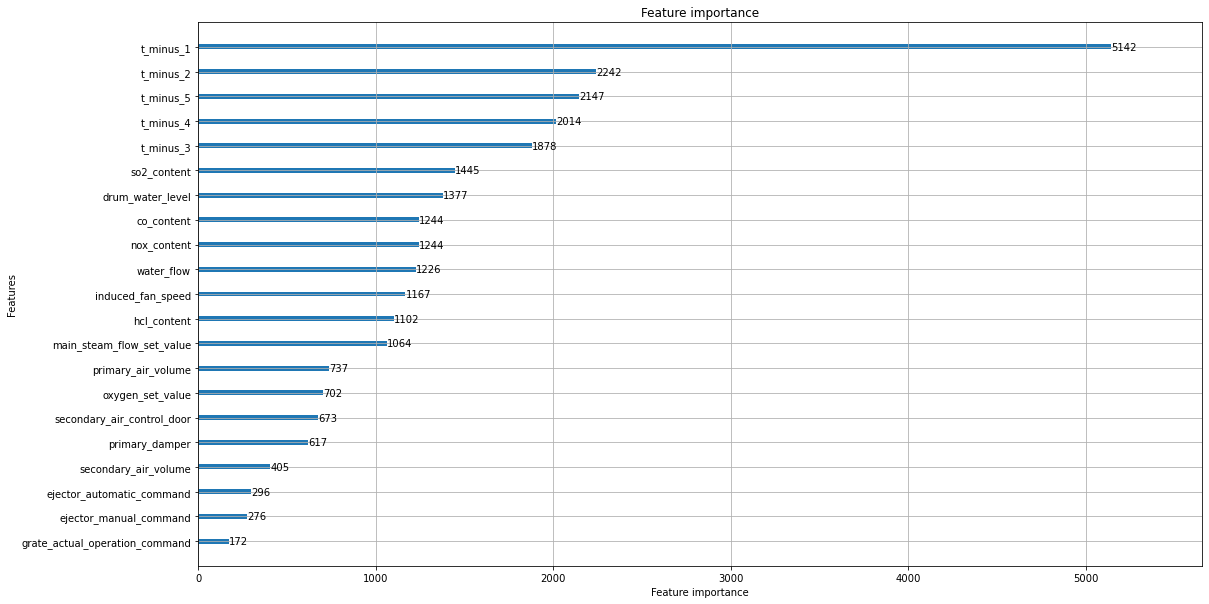

In [73]:
lgb.plot_importance(lgbmRegressor, figsize=(18, 10))

### batch prediction

In [97]:
# retrieve test_x
# test_x = testing[numerical_features + categorical_columns_onehot]
test_x = testing[numerical_features]
y_pred = lgbmRegressor.predict(test_x)
print(y_pred)

[57.2104731  57.2104731  57.2104731  ... 54.45411442 54.59542969
 54.59542969]


## loop prediction

In [76]:
testing[time_series_features].head(10)

,t_minus_1,t_minus_2,t_minus_3,t_minus_4,t_minus_5
0,58.0246,58.0246,58.0246,58.0246,58.0246
1,-1.0000,58.0246,58.0246,58.0246,58.0246
2,-1.0000,-1.0000,58.0246,58.0246,58.0246
3,-1.0000,-1.0000,-1.0000,58.0246,58.0246
4,-1.0000,-1.0000,-1.0000,-1.0000,58.0246
5,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
6,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
7,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
8,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
9,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000


In [37]:
# an example how to modify a signle row's value by key
t = testing.iloc[1][numerical_features]
t['t_minus_1'] = -2
t

oxygen_set_value                        25.0
primary_air_volume                73729.4688
main_steam_flow_set_value               60.0
ejector_manual_command                  40.0
ejector_automatic_command               70.0
nox_content                         111.4074
grate_actual_operation_command          50.0
secondary_air_control_door           49.4375
hcl_content                           2.8194
secondary_air_volume              18472.9531
water_flow                           68.6643
so2_content                           3.2778
drum_water_level                      7.4884
induced_fan_speed                    67.4167
co_content                            2.5208
primary_damper                       65.5532
t_minus_1                               -1.0
Name: 1, dtype: object

In [96]:
# init varaiables
pred = 0
y_pred = []
for i in range(testing.shape[0]):

    # retrieve features
    t = testing.iloc[i][numerical_features + time_series_features]
    # fill up t minus 1 if not first data point
    if i != 0:
        if i < look_back:
            s_idx = 0
            e_idx = i
        else:
            s_idx = i - look_back
            e_idx = i
        # retrieve prev step prediction by idx
        pre_preds = y_pred[s_idx:e_idx]
        # log
        # print(f"start_idx:{s_idx}, end_idx:{e_idx}, y_pred_length:{len(y_pred)}, y_pred:{y_pred}, pre_pred:{pre_preds}")
        for idx, p in enumerate(pre_preds):
            t[f't_minus_{idx+1}'] = pred
    # make prediction
    pred = lgbmRegressor.predict(t.values.reshape(-1, len(numerical_features + time_series_features)))
    # log
    # print(f"At step {i} predicted value is {pred}")
    # append to array
    y_pred.append(pred[0])
    
y_pred

[58.02504899665768,
 58.03195054997079,
 58.034046617780675,
 58.04411695205141,
 58.05101839611298,
 58.05114672716153,
 58.05114672716153,
 58.05101839611298,
 58.05114672716153,
 58.050790064446716,
 58.050661733398165,
 58.050661733398165,
 58.050661733398165,
 58.050790064446716,
 58.050790064446716,
 58.050661733398165,
 58.050661733398165,
 58.050661733398165,
 58.050661733398165,
 58.050790064446716,
 58.050661733398165,
 58.050661733398165,
 58.050790064446716,
 58.050790064446716,
 58.050661733398165,
 58.050661733398165,
 58.05096834597503,
 58.05096834597503,
 58.05096834597503,
 58.05159479704228,
 58.05172312809083,
 58.05172312809083,
 58.05172312809083,
 58.05159479704228,
 58.05159479704228,
 58.05172312809083,
 58.05159479704228,
 58.05119667764129,
 58.05119667764129,
 58.05264188199417,
 58.05264188199417,
 58.05264188199417,
 58.05264188199417,
 58.05264188199417,
 58.05264188199417,
 58.05264188199417,
 58.05264188199417,
 58.05264188199417,
 58.052463600465856,
 

In [97]:
# generate submission file
submission_file = pd.DataFrame(data={'ID':[i for i in range(1, 1801)], 'Time':testing['datetime'].values, 'Steam_flow':y_pred})
submission_file.head()

,ID,Time,Steam_flow
0,1,2021-12-22 23:30:00,58.025049
1,2,2021-12-22 23:30:01,58.031951
2,3,2021-12-22 23:30:02,58.034047
3,4,2021-12-22 23:30:03,58.044117
4,5,2021-12-22 23:30:04,58.051018


In [98]:
submission_file.tail()

,ID,Time,Steam_flow
1795,1796,2021-12-22 23:59:55,58.573323
1796,1797,2021-12-22 23:59:56,58.573721
1797,1798,2021-12-22 23:59:57,58.573721
1798,1799,2021-12-22 23:59:58,58.573887
1799,1800,2021-12-22 23:59:59,58.573489


In [111]:
# round up
# submission_file['Steam_flow'] = np.ceil(submission_file['Steam_flow'])
# submission_file.head()

,ID,Time,Steam_flow
0,1,2021-12-22 23:30:00,58.0
1,2,2021-12-22 23:30:01,58.0
2,3,2021-12-22 23:30:02,58.0
3,4,2021-12-22 23:30:03,58.0
4,5,2021-12-22 23:30:04,58.0


In [99]:
# write to local disk
submission_file.to_csv('../submission_lgbm.csv', index=False)